In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install --upgrade pip

In [3]:
!pip install shapely

In [4]:
import pandas as pd
AITools_df = pd.read_excel("Artificial Intelligence Tools 2023.xlsx")
AITools_df

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,NaN,NaN,https://farm3d.github.io/?utm_source=futureped...,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/?utm...,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,NaN,https://www.trymaverick.com/?utm_source=future...,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,NaN,NaN,https://0xai.quest?utm_source=futurepedia&utm_...,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,NaN,NaN,https://10web.io/?utm_source=futurepedia&utm_m...,code
...,...,...,...,...,...,...,...,...
4964,Zoom Iq,Capture meaningful and actionable insights fro...,Contact for Pricing,/ summarizer / email assistant,NaN,2,https://blog.zoom.us/zoom-iq-smart-companion/?...,text
4965,Zoomscape Ai,ZoomScape AI is an AI-powered tool that enable...,Free Trial,/ presentations,5,NaN,https://zoomscape.ai/?utm_source=futurepedia&u...,business
4966,Zust Qr,Enables users to craft artistic QR codes by in...,Free,/ image generator,NaN,NaN,https://qr.zust.ai/?utm_source=futurepedia&utm...,image
4967,Zuva,Contract analysis and insight generation.,Free Trial,/ legal assistant,$ 50/mo,1,https://zuva.ai/widget/try-it/?utm_source=futu...,business


In [10]:
# Checking for missing values
missing_values = AITools_df.isnull().sum()

# Standardizing formats
AITools_df_clean = AITools_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
AITools_df_clean['AI Tool Name'] = AITools_df_clean['AI Tool Name'].str.title()
AITools_df_clean['Major Category'] = AITools_df_clean['Major Category'].str.lower()

cleaned_data_head = AITools_df_clean.head()
missing_values, cleaned_data_head

(AI Tool Name          0
 Description           0
 Free/Paid/Other       0
 Useable For           0
 Charges            2435
 Review             3507
 Tool Link             0
 Major Category        0
 dtype: int64,
     AI Tool Name                                        Description  \
 0         Farm3D  Learning Articulated 3D Animals by Distilling ...   
 1  Mailbutler Ai  AI-powered Smart Assistant for Outlook, Gmail ...   
 2       Maverick       Send customers personalized videos at scale.   
 3           0Xai       Stable Diffusion Prompt And Images Generator   
 4          10Web  AI-powered WordPress platform for automated we...   
 
   Free/Paid/Other                      Useable For    Charges Review  \
 0            Free            / experiments    / 3D        NaN    NaN   
 1        Freemium                / email assistant  $ 4.95/mo      1   
 2            Paid  / e-commerce    / audio editing   $ 100/mo    NaN   
 3            Free   / image generator    / prompts        

In [11]:
# Handling Missing Values
AITools_df_clean['Charges'].fillna('Not Available', inplace=True)
AITools_df_clean['Review'].fillna('No Review', inplace=True)

# Standardizing 'Useable For' and 'Charges' Fields
AITools_df_clean['Useable For'] = AITools_df_clean['Useable For'].str.strip().str.replace(' +', ' ', regex=True)
AITools_df_clean['Charges'] = AITools_df_clean['Charges'].str.replace(' +', ' ', regex=True)

# Removing unnecessary information from URLs
AITools_df_clean['Tool Link'] = AITools_df_clean['Tool Link'].str.split('?').str[0]

further_cleaned_data_head = AITools_df_clean.head()
further_cleaned_data_head

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,Learning Articulated 3D Animals by Distilling ...,Free,/ experiments / 3D,Not Available,No Review,https://farm3d.github.io/,other
1,Mailbutler Ai,"AI-powered Smart Assistant for Outlook, Gmail ...",Freemium,/ email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/,text
2,Maverick,Send customers personalized videos at scale.,Paid,/ e-commerce / audio editing,$ 100/mo,No Review,https://www.trymaverick.com/,audio
3,0Xai,Stable Diffusion Prompt And Images Generator,Free,/ image generator / prompts,Not Available,No Review,https://0xai.quest,image
4,10Web,AI-powered WordPress platform for automated we...,Freemium,/ low-code/no-code,Not Available,No Review,https://10web.io/,code


In [12]:
# Text normalization in 'Description' and 'Useable For':
# Converting to lowercase, removing punctuation, and text normalization.

import re

def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Applying text normalization to 'Description' and 'Useable For' columns
AITools_df_clean['Description'] = AITools_df_clean['Description'].apply(normalize_text)

normalized_data_head = AITools_df_clean.head()
normalized_data_head

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category
0,Farm3D,learning articulated 3d animals by distilling ...,Free,experiments 3d,Not Available,No Review,https://farm3d.github.io/,other
1,Mailbutler Ai,aipowered smart assistant for outlook gmail an...,Freemium,email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/,text
2,Maverick,send customers personalized videos at scale,Paid,ecommerce audio editing,$ 100/mo,No Review,https://www.trymaverick.com/,audio
3,0Xai,stable diffusion prompt and images generator,Free,image generator prompts,Not Available,No Review,https://0xai.quest,image
4,10Web,aipowered wordpress platform for automated web...,Freemium,lowcodenocode,Not Available,No Review,https://10web.io/,code


In [14]:
# Cross-field validation: 'Free/Paid/Other' vs. 'Charges'

# Creating a function to check for inconsistencies
def check_inconsistencies(row):
    if row['Free/Paid/Other'].lower() == 'free' and row['Charges'] != 'Not Available':
        return 'Inconsistency'
    if row['Free/Paid/Other'].lower() in ['paid', 'freemium'] and row['Charges'] == 'Not Available':
        return 'Inconsistency'
    return 'Consistent'

# Applying the function to the dataset
AITools_df_clean['Consistency Check'] = AITools_df_clean.apply(check_inconsistencies, axis=1)

# Counting the number of inconsistencies
inconsistencies_count = AITools_df_clean['Consistency Check'].value_counts()

inconsistencies_count, AITools_df_clean[AITools_df_clean['Consistency Check'] == 'Inconsistency'].head()


(Consistent       4635
 Inconsistency     334
 Name: Consistency Check, dtype: int64,
      AI Tool Name                                        Description  \
 4           10Web  aipowered wordpress platform for automated web...   
 10          5-Out      maximize the profitability of your restaurant   
 12     60Sec.Site  create a custom landing page for your app in 6...   
 29        Adam.Ai            allinone meeting platform powered by ai   
 40  Adobe Firefly                    generative ai made for creators   
 
    Free/Paid/Other                          Useable For        Charges  \
 4         Freemium                        lowcodenocode  Not Available   
 10            Paid               finance  startup tools  Not Available   
 12        Freemium                        lowcodenocode  Not Available   
 29        Freemium                           summarizer  Not Available   
 40            Paid   image generator  video editing  3d  Not Available   
 
        Review        

In [15]:
# Excluding inconsistent entries from the dataset
AITools_df_consistent = AITools_df_clean[AITools_df_clean['Consistency Check'] == 'Consistent']

# Dropping the 'Consistency Check' column as it's no longer needed
AITools_df_consistent = AITools_df_consistent.drop(columns=['Consistency Check'])

updated_dataset_info = AITools_df_consistent.info()
first_few_rows = AITools_df_consistent.head()
updated_dataset_info, first_few_rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 0 to 4968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AI Tool Name     4635 non-null   object
 1   Description      4635 non-null   object
 2   Free/Paid/Other  4635 non-null   object
 3   Useable For      4635 non-null   object
 4   Charges          3997 non-null   object
 5   Review           4635 non-null   object
 6   Tool Link        4635 non-null   object
 7   Major Category   4635 non-null   object
dtypes: object(8)
memory usage: 325.9+ KB


(None,
     AI Tool Name                                        Description  \
 0         Farm3D  learning articulated 3d animals by distilling ...   
 1  Mailbutler Ai  aipowered smart assistant for outlook gmail an...   
 2       Maverick        send customers personalized videos at scale   
 3           0Xai       stable diffusion prompt and images generator   
 5    1Pm Workout                      become the next one punch man   
 
   Free/Paid/Other                Useable For        Charges     Review  \
 0            Free            experiments  3d  Not Available  No Review   
 1        Freemium            email assistant      $ 4.95/mo          1   
 2            Paid   ecommerce  audio editing       $ 100/mo  No Review   
 3            Free   image generator  prompts  Not Available  No Review   
 5            Free                    fitness  Not Available  No Review   
 
                                     Tool Link Major Category  
 0                   https://farm3d.github.

In [16]:
# Checking the dataset for duplicates
duplicates = AITools_df_consistent.duplicated().sum()

duplicates

0

In [17]:
# Correcting the function to handle non-string values in 'Charges'

def convert_to_monthly_rate(charge):
    if pd.isna(charge) or not isinstance(charge, str):
        return 'Not Available'
    if 'mo' in charge:
        # Assuming the value is already a monthly rate
        return charge
    elif 'yr' in charge or 'year' in charge:
        # Converting yearly rate to monthly rate
        rate = float(re.findall(r'\d+\.?\d*', charge)[0])
        monthly_rate = rate / 12
        return f'$ {monthly_rate:.2f}/mo'
    elif 'one-time' in charge or 'once' in charge:
        # Handling one-time charges as special cases
        return 'One-time charge'
    else:
        # For other cases, returning as 'Varied/Complex Pricing'
        return 'Varied/Complex Pricing'

# Applying the corrected conversion function to the 'Charges' field
AITools_df_consistent['Charges'] = AITools_df_consistent['Charges'].apply(convert_to_monthly_rate)

transformed_charges = AITools_df_consistent['Charges'].value_counts()
transformed_charges.head(10), AITools_df_consistent.head()

(Varied/Complex Pricing    2210
 Not Available              638
 $ 10/mo                     97
 $ 9/mo                      89
 $ 19/mo                     87
 $ 29/mo                     72
 $ 5/mo                      67
 $ 9.99/mo                   62
 $ 15/mo                     61
 $ 20/mo                     53
 Name: Charges, dtype: int64,
     AI Tool Name                                        Description  \
 0         Farm3D  learning articulated 3d animals by distilling ...   
 1  Mailbutler Ai  aipowered smart assistant for outlook gmail an...   
 2       Maverick        send customers personalized videos at scale   
 3           0Xai       stable diffusion prompt and images generator   
 5    1Pm Workout                      become the next one punch man   
 
   Free/Paid/Other                Useable For                 Charges  \
 0            Free            experiments  3d  Varied/Complex Pricing   
 1        Freemium            email assistant               $ 4.95/mo 

In [18]:
# Normalizing currency and format in the 'Charges' column

def normalize_currency_format(charge):
    if 'mo' in charge:
        # Extracting the numerical value and standardizing the format
        amount = float(re.findall(r'\d+\.?\d*', charge)[0])
        return f'$ {amount:.2f}/mo'
    # For 'One-time charge', 'Varied/Complex Pricing', and 'Not Available', return as is
    return charge

# Applying the normalization function to the 'Charges' field
AITools_df_consistent['Charges'] = AITools_df_consistent['Charges'].apply(normalize_currency_format)

normalized_charges = AITools_df_consistent['Charges'].value_counts()
normalized_charges.head(10), AITools_df_consistent.head()


(Varied/Complex Pricing    2210
 Not Available              638
 $ 10.00/mo                 115
 $ 9.00/mo                  107
 $ 19.00/mo                 100
 $ 29.00/mo                  85
 $ 5.00/mo                   76
 $ 15.00/mo                  75
 $ 9.99/mo                   71
 $ 20.00/mo                  63
 Name: Charges, dtype: int64,
     AI Tool Name                                        Description  \
 0         Farm3D  learning articulated 3d animals by distilling ...   
 1  Mailbutler Ai  aipowered smart assistant for outlook gmail an...   
 2       Maverick        send customers personalized videos at scale   
 3           0Xai       stable diffusion prompt and images generator   
 5    1Pm Workout                      become the next one punch man   
 
   Free/Paid/Other                Useable For                 Charges  \
 0            Free            experiments  3d  Varied/Complex Pricing   
 1        Freemium            email assistant               $ 4.95/mo 

In [33]:
# Converting the 'Review' field to a numeric format
AITools_df_consistent['Review Numeric'] = pd.to_numeric(AITools_df_consistent['Review'], errors='coerce')

# Identifying outliers in the 'Review Numeric' field
# We will use the Interquartile Range (IQR) method for outlier detection
Q1 = AITools_df_consistent['Review Numeric'].quantile(0.25)
Q3 = AITools_df_consistent['Review Numeric'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_lower = Q1 - 1.5 * IQR
outlier_threshold_upper = Q3 + 1.5 * IQR

# Counting outliers
outliers = AITools_df_consistent[(AITools_df_consistent['Review Numeric'] < outlier_threshold_lower) | 
                                 (AITools_df_consistent['Review Numeric'] > outlier_threshold_upper)]
outliers_count = outliers.shape[0]

outliers_count, outliers.head()

(142,
                  AI Tool Name  \
 34              Adcreative.Ai   
 77   Ai Chat Travel Assistant   
 118                 Ai Lawyer   
 165                  Ai Story   
 174              Ai Templates   
 
                                            Description Free/Paid/Other  \
 34   create conversionfocused ads  posts quickly  e...      Free Trial   
 77   ai to help plan your trips offering custom iti...        Freemium   
 118               personal ailawyer at your fingertips      Free Trial   
 165  aipowered story generator for creating short s...            Free   
 174  boost productivity for solopreneurs with produ...            Free   
 
                               Useable For                 Charges Review  \
 34    copywriting  social media assistant              $ 29.00/mo      8   
 77                                 travel           Not Available      4   
 118                       legal assistant  Varied/Complex Pricing      4   
 165                        

In [34]:
# Converting the 'Charges' field to numeric for entries with specific monthly charges
AITools_df_consistent['Charges Numeric'] = pd.to_numeric(AITools_df_consistent['Charges'].str.extract(r'(\d+\.\d+)')[0], 
                                                         errors='coerce')

# Identifying outliers in the 'Charges Numeric' field
Q1_charges = AITools_df_consistent['Charges Numeric'].quantile(0.25)
Q3_charges = AITools_df_consistent['Charges Numeric'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges
outlier_threshold_lower_charges = Q1_charges - 1.5 * IQR_charges
outlier_threshold_upper_charges = Q3_charges + 1.5 * IQR_charges

# Counting outliers
outliers_charges = AITools_df_consistent[(AITools_df_consistent['Charges Numeric'] < outlier_threshold_lower_charges) | 
                                   (AITools_df_consistent['Charges Numeric'] > outlier_threshold_upper_charges)]
outliers_count_charges = outliers_charges.shape[0]

outliers_count_charges, outliers_charges.head()


(164,
            AI Tool Name                                        Description  \
 2              Maverick        send customers personalized videos at scale   
 16         A.V. Mapping  ai recommends videoâs music with license benef...   
 23                  Ace   developed engineering leadership growth solution   
 95   Ai Email Generator  ai email generator is an aipowered tool design...   
 268               Akkio                         modern business runs on ai   
 
     Free/Paid/Other                Useable For      Charges     Review  \
 2              Paid   ecommerce  audio editing  $ 100.00/mo  No Review   
 16         Freemium                      music   $ 60.00/mo  No Review   
 23       Free Trial            human resources  $ 149.00/mo  No Review   
 95         Freemium            email assistant   $ 85.00/mo  No Review   
 268      Free Trial                        sql   $ 60.00/mo  No Review   
 
                                              Tool Link Major Cate

In [22]:
# Replace 'consistent_data' with the name of your DataFrame variable
AITools_df_consistent.to_excel('Cleaned_AI_Tools_2023.xlsx', index=False)

In [1]:
import pandas as pd
AI_Tools_2023_df = pd.read_excel("Cleaned_AI_Tools_2023.xlsx")
AI_Tools_2023_df

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category,Review Numeric,Charges Numeric
0,Farm3D,learning articulated 3d animals by distilling ...,Free,experiments 3d,Varied/Complex Pricing,No Review,https://farm3d.github.io/,other,NaN,NaN
1,Mailbutler Ai,aipowered smart assistant for outlook gmail an...,Freemium,email assistant,$ 4.95/mo,1,https://www.mailbutler.io/smart-assistant/,text,1.0,4.95
2,Maverick,send customers personalized videos at scale,Paid,ecommerce audio editing,$ 100.00/mo,No Review,https://www.trymaverick.com/,audio,NaN,100.00
3,0Xai,stable diffusion prompt and images generator,Free,image generator prompts,Varied/Complex Pricing,No Review,https://0xai.quest,image,NaN,NaN
4,1Pm Workout,become the next one punch man,Free,fitness,Varied/Complex Pricing,No Review,https://opmworkout.ml/,other,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4630,Zoom Iq,capture meaningful and actionable insights fro...,Contact for Pricing,summarizer email assistant,Varied/Complex Pricing,2,https://blog.zoom.us/zoom-iq-smart-companion/,text,2.0,NaN
4631,Zoomscape Ai,zoomscape ai is an aipowered tool that enables...,Free Trial,presentations,Not Available,No Review,https://zoomscape.ai/,business,NaN,NaN
4632,Zust Qr,enables users to craft artistic qr codes by in...,Free,image generator,Varied/Complex Pricing,No Review,https://qr.zust.ai/,image,NaN,NaN
4633,Zuva,contract analysis and insight generation,Free Trial,legal assistant,$ 50.00/mo,1,https://zuva.ai/widget/try-it/,business,1.0,50.00


# Pricing Model Analysis: Investigate how pricing models (free, paid, freemium) correlate with other factors like tool categories or user reviews.

In [2]:
# Conducting Pricing Model Analysis

pricing_model_analysis = AI_Tools_2023_df.groupby('Free/Paid/Other').agg(
    Average_Review=('Review Numeric', 'mean'),
    Tool_Count=('AI Tool Name', 'count')
).reset_index()

category_distribution = AI_Tools_2023_df.groupby(['Free/Paid/Other', 'Major Category']).size().unstack(fill_value=0)

analysis_result = pd.merge(pricing_model_analysis, category_distribution, on='Free/Paid/Other')

analysis_result

,Free/Paid/Other,Average_Review,Tool_Count,3d,audio,business,code,image,other,text,video
0,Contact for Pricing,1.068966,325,12,19,117,70,22,40,37,8
1,Deals,3.000000,1,0,0,0,0,1,0,0,0
2,Free,1.919672,1663,14,89,356,177,199,499,314,15
3,Free Trial,2.122727,771,2,62,192,84,117,73,220,21
4,Free | Freemium | Paid,1.000000,1,0,1,0,0,0,0,0,0
5,Free | Paid,NaN,1,0,0,0,0,1,0,0,0
6,Free-Trial | Deals,7.000000,3,0,0,1,0,0,0,2,0
7,Free-Trial | Freemium,1.000000,8,0,1,0,0,2,1,4,0
8,Free-Trial | Paid,1.000000,8,0,0,1,1,0,0,6,0
9,FreeDeals,NaN,1,0,0,1,0,0,0,0,0


In [3]:
# Top 5 Pricing Models vs Tool – Count

analysis_result_Tool_Count_sorted_df = analysis_result.sort_values(by='Tool_Count', ascending=False)
analysis_result_Tool_Count_sorted_df.head()

,Free/Paid/Other,Average_Review,Tool_Count,3d,audio,business,code,image,other,text,video
2,Free,1.919672,1663,14,89,356,177,199,499,314,15
11,Freemium,1.926910,1072,6,71,257,136,154,121,290,37
3,Free Trial,2.122727,771,2,62,192,84,117,73,220,21
16,Paid,1.546392,751,2,55,192,59,176,75,175,17
0,Contact for Pricing,1.068966,325,12,19,117,70,22,40,37,8


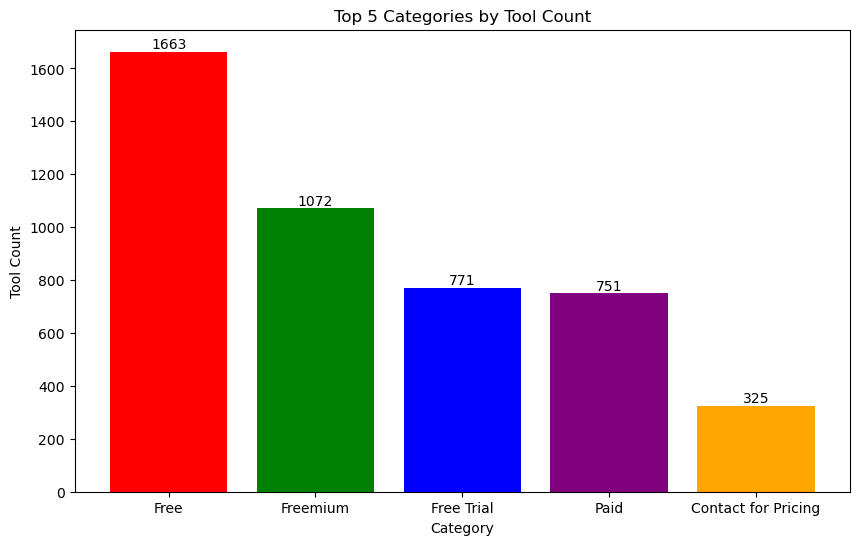

In [4]:
# Top 5 Pricing Models vs Tool – Count

import matplotlib.pyplot as plt

top_5 = analysis_result_Tool_Count_sorted_df.head(5)

colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5['Free/Paid/Other'], top_5['Tool_Count'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.grid(False)

plt.title('Top 5 Categories by Tool Count')
plt.xlabel('Category')
plt.ylabel('Tool Count')

plt.show()

In [5]:
# Top 5 Pricing Models vs Review

analysis_result_Average_Review_sorted_df = analysis_result.sort_values(by='Average_Review', ascending=False)
analysis_result_Average_Review_sorted_df.head()

,Free/Paid/Other,Average_Review,Tool_Count,3d,audio,business,code,image,other,text,video
6,Free-Trial | Deals,7.000000,3,0,0,1,0,0,0,2,0
12,Freemium | Deals,5.600000,8,0,2,1,3,1,0,1,0
1,Deals,3.000000,1,0,0,0,0,1,0,0,0
3,Free Trial,2.122727,771,2,62,192,84,117,73,220,21
11,Freemium,1.926910,1072,6,71,257,136,154,121,290,37


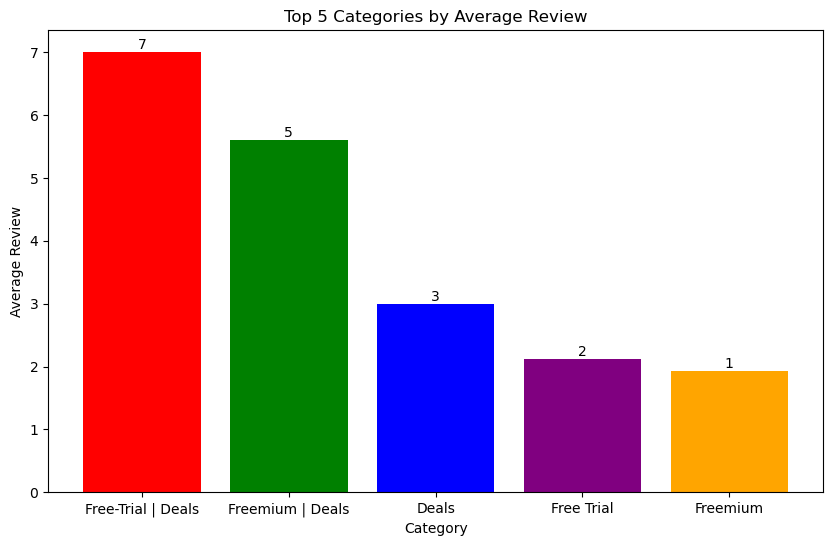

In [6]:
# Top 5 Pricing Models vs Review

import matplotlib.pyplot as plt

top_5 = analysis_result_Average_Review_sorted_df.head(5)

colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5['Free/Paid/Other'], top_5['Average_Review'], color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.grid(False)

plt.title('Top 5 Categories by Average Review')
plt.xlabel('Category')
plt.ylabel('Average Review')

plt.show()

## Heat Map for Tool Category vs. Pricing Model:  
A heat map can be used to show the concentration of tools at the intersection of pricing models and categories. This will quickly identify which combinations are most common.

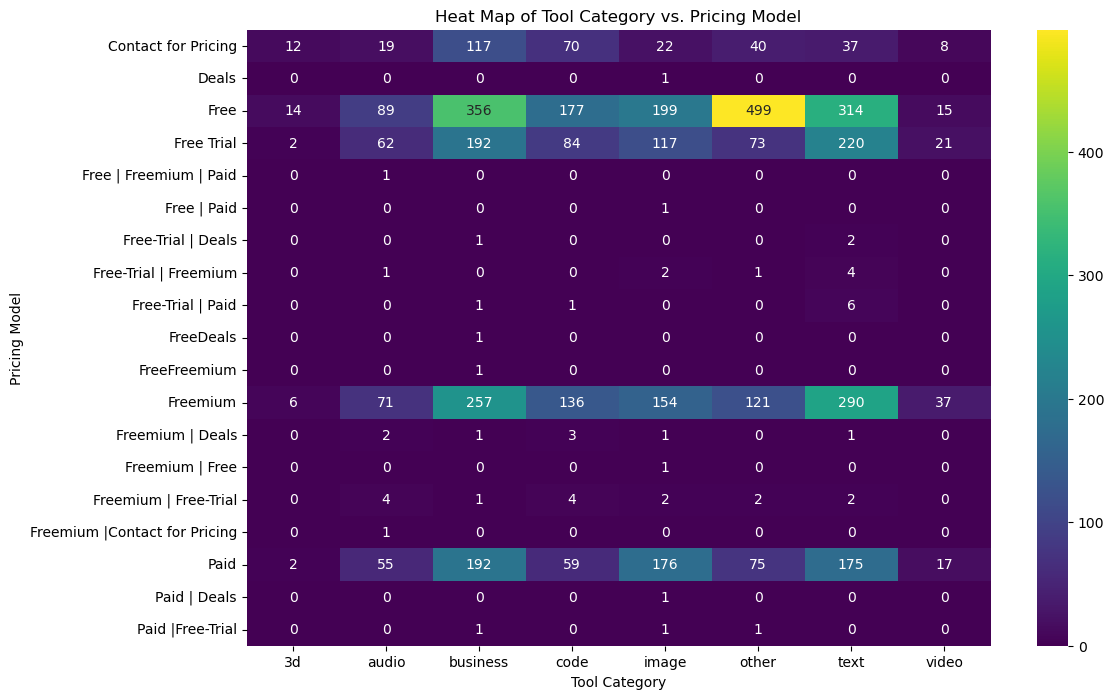

In [12]:
# Heat Map for Tool Category vs. Pricing Model

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_include = analysis_result.columns.difference(['Free/Paid/Other', 'Average_Review', 'Tool_Count'])
pivot_df = analysis_result.pivot_table(index='Free/Paid/Other', values=columns_to_include, aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt="d")

plt.title('Heat Map of Tool Category vs. Pricing Model')
plt.xlabel('Tool Category')
plt.ylabel('Pricing Model')

plt.show()

# Tool Distribution Across Categories:   
A bar chart can effectively showcase the distribution of tools across different categories (business, code, audio, etc.). This visual will highlight the most populated categories at a glance.

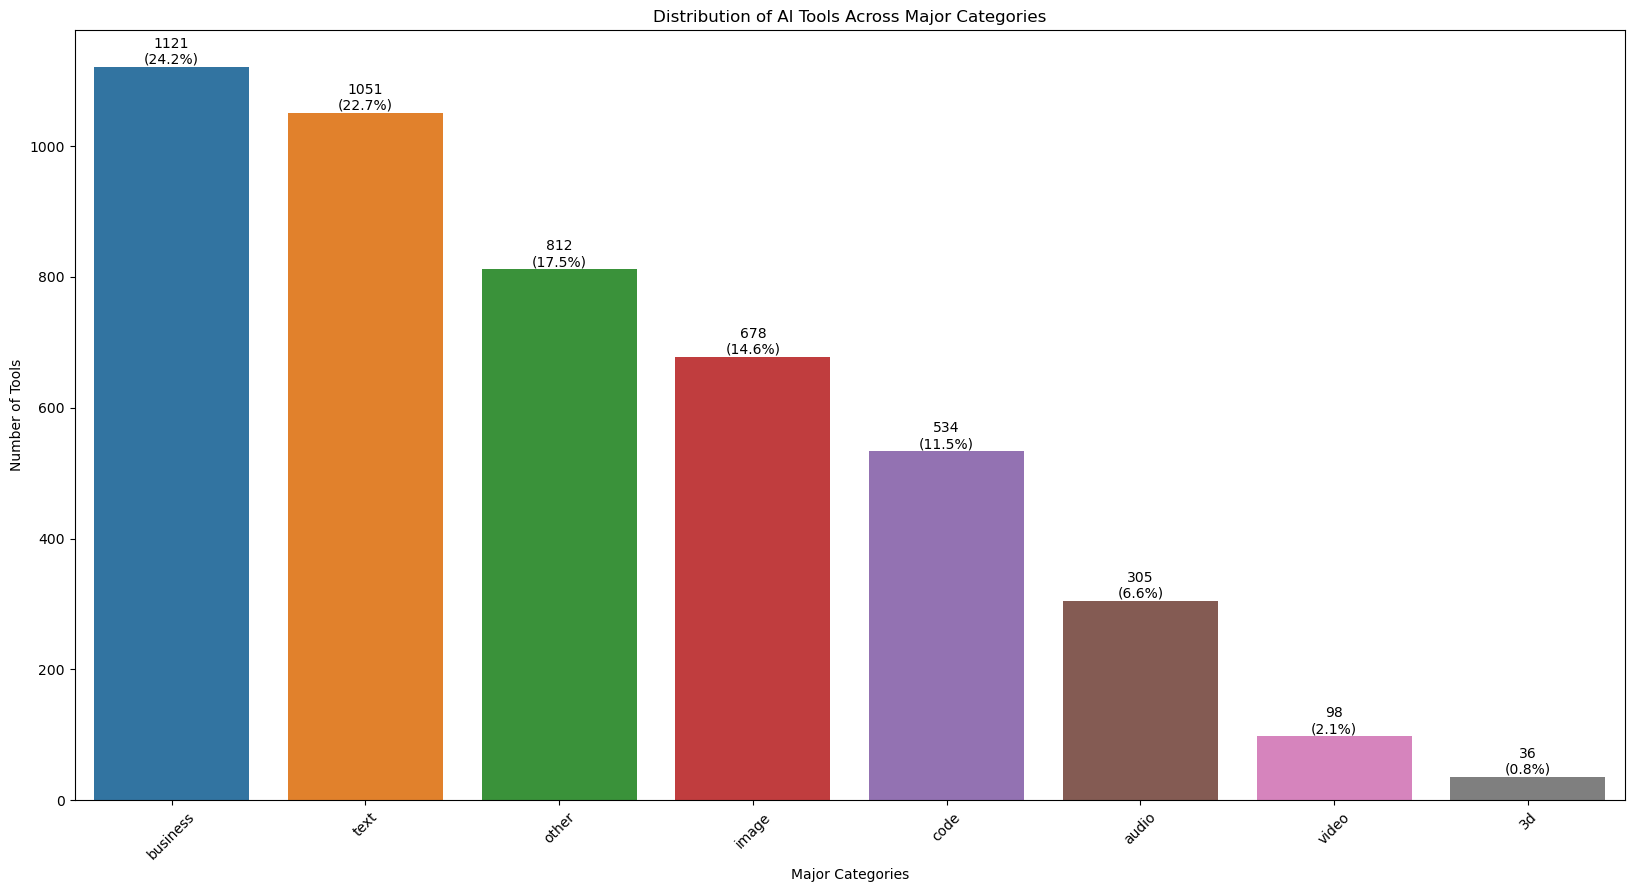

In [13]:
# Distribution of AI Tools Across Different Categories

import seaborn as sns

category_counts = AI_Tools_2023_df['Major Category'].value_counts()

total_tools = category_counts.sum()
category_percentages = (category_counts / total_tools) * 100

plt.figure(figsize=(20, 10))
bars = sns.barplot(x=category_counts.index, y=category_counts.values)

for bar, percentage in zip(bars.patches, category_percentages):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height()
    text = f'{int(text_y)}\n({percentage:.1f}%)'
    bars.text(text_x, text_y, text, ha='center', va='bottom')
    
plt.grid(False)

plt.title('Distribution of AI Tools Across Major Categories')
plt.xlabel('Major Categories')
plt.ylabel('Number of Tools')
plt.xticks(rotation=45)
plt.show()

In [14]:
key_players_criteria = AI_Tools_2023_df[(AI_Tools_2023_df['Review'] != 'No Review') & 
                                        (AI_Tools_2023_df['Free/Paid/Other'].isin(['Freemium', 'Paid']))]

key_players_by_category = key_players_criteria.groupby('Major Category').apply(lambda x: x.sort_values(['Free/Paid/Other', 'Review'], 
                                                                                                       ascending=False)).reset_index(drop=True)

top_key_players_by_category = key_players_by_category.groupby('Major Category').head(3)

top_key_players_by_category

,AI Tool Name,Description,Free/Paid/Other,Useable For,Charges,Review,Tool Link,Major Category,Review Numeric,Charges Numeric
0,Speechflow,accurate speechtotext api for all languages be...,Paid,developer tools customer support transcriber,Varied/Complex Pricing,5,https://speechflow.io/,audio,5.0,NaN
1,Scribebuddy,scribebuddy is an aipowered tool that simplifi...,Paid,transcriber,Not Available,4,https://secure.scribebuddy.com/lifetime-transc...,audio,4.0,NaN
2,Synthesys Studio,synthesys develops algorithms for texttovoiceo...,Paid,text to speech video generator,$ 27.00/mo,4,https://synthesys.io,audio,4.0,27.00
36,Chatbase,build an ai chatbot trained on your data,Paid,education assistant,$ 19.00/mo,5,https://www.chatbase.co/,business,5.0,19.00
37,Magicflow,the ai productivity tracker that helps you focus,Paid,productivity,$ 15.00/mo,3,https://magicflow.com/,business,3.0,15.00
38,Bizway,turn your business ideas into actionable roadm...,Paid,startup tools,$ 19.00/mo,2,https://www.bizway.io/,business,2.0,19.00
183,Jusi,aipowered tool that enables businesses to brin...,Paid,developer tools startup tools productivity,Not Available,22,https://jusi.me,code,22.0,NaN
184,Getchatgpt,native chatgpt services with easy access and e...,Paid,developer tools,Not Available,3,https://getgptapi.com/,code,3.0,NaN
185,B12.Io,ai website builder that generates full pages p...,Paid,lowcodenocode,$ 42.00/mo,2,https://www.b12.io/ai-website-builder/,code,2.0,42.00
231,Thinkdiffusion,thinkdiffusion is an accessible and userfriend...,Paid,image generator,Varied/Complex Pricing,11,https://www.thinkdiffusion.com/,image,11.0,NaN


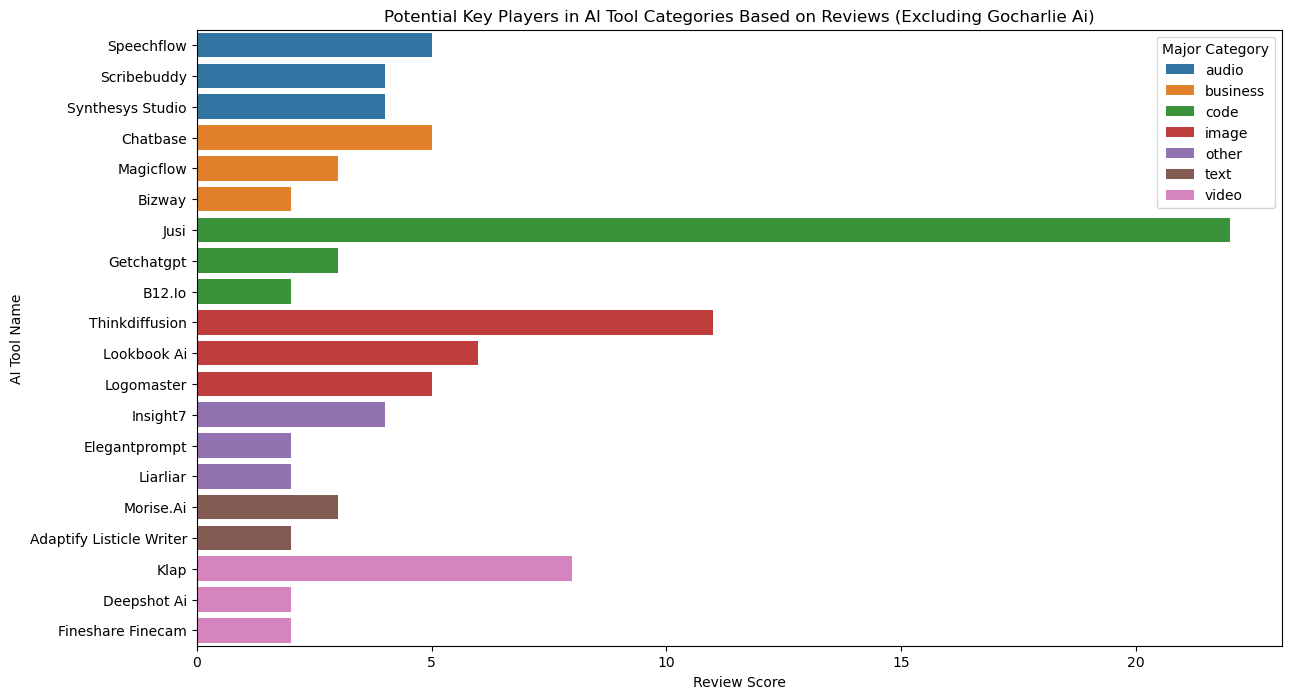

In [18]:
# The visualization of potential key players in various AI tool categories based on their review scores. 

import matplotlib.pyplot as plt
import seaborn as sns

visualization_data = top_key_players_by_category[['Major Category', 'AI Tool Name', 'Review Numeric']].copy()
visualization_data['Review Numeric'] = visualization_data['Review Numeric'].fillna(0) 

visualization_data_filtered = visualization_data[visualization_data['AI Tool Name'] != 'Gocharlie Ai']

plt.figure(figsize=(14, 8))

sns.barplot(x='Review Numeric', y='AI Tool Name', hue='Major Category', data=visualization_data_filtered, dodge=False)

plt.title('Potential Key Players in AI Tool Categories Based on Reviews (Excluding Gocharlie Ai)')
plt.xlabel('Review Score')
plt.ylabel('AI Tool Name')
plt.legend(title='Major Category')

plt.show()

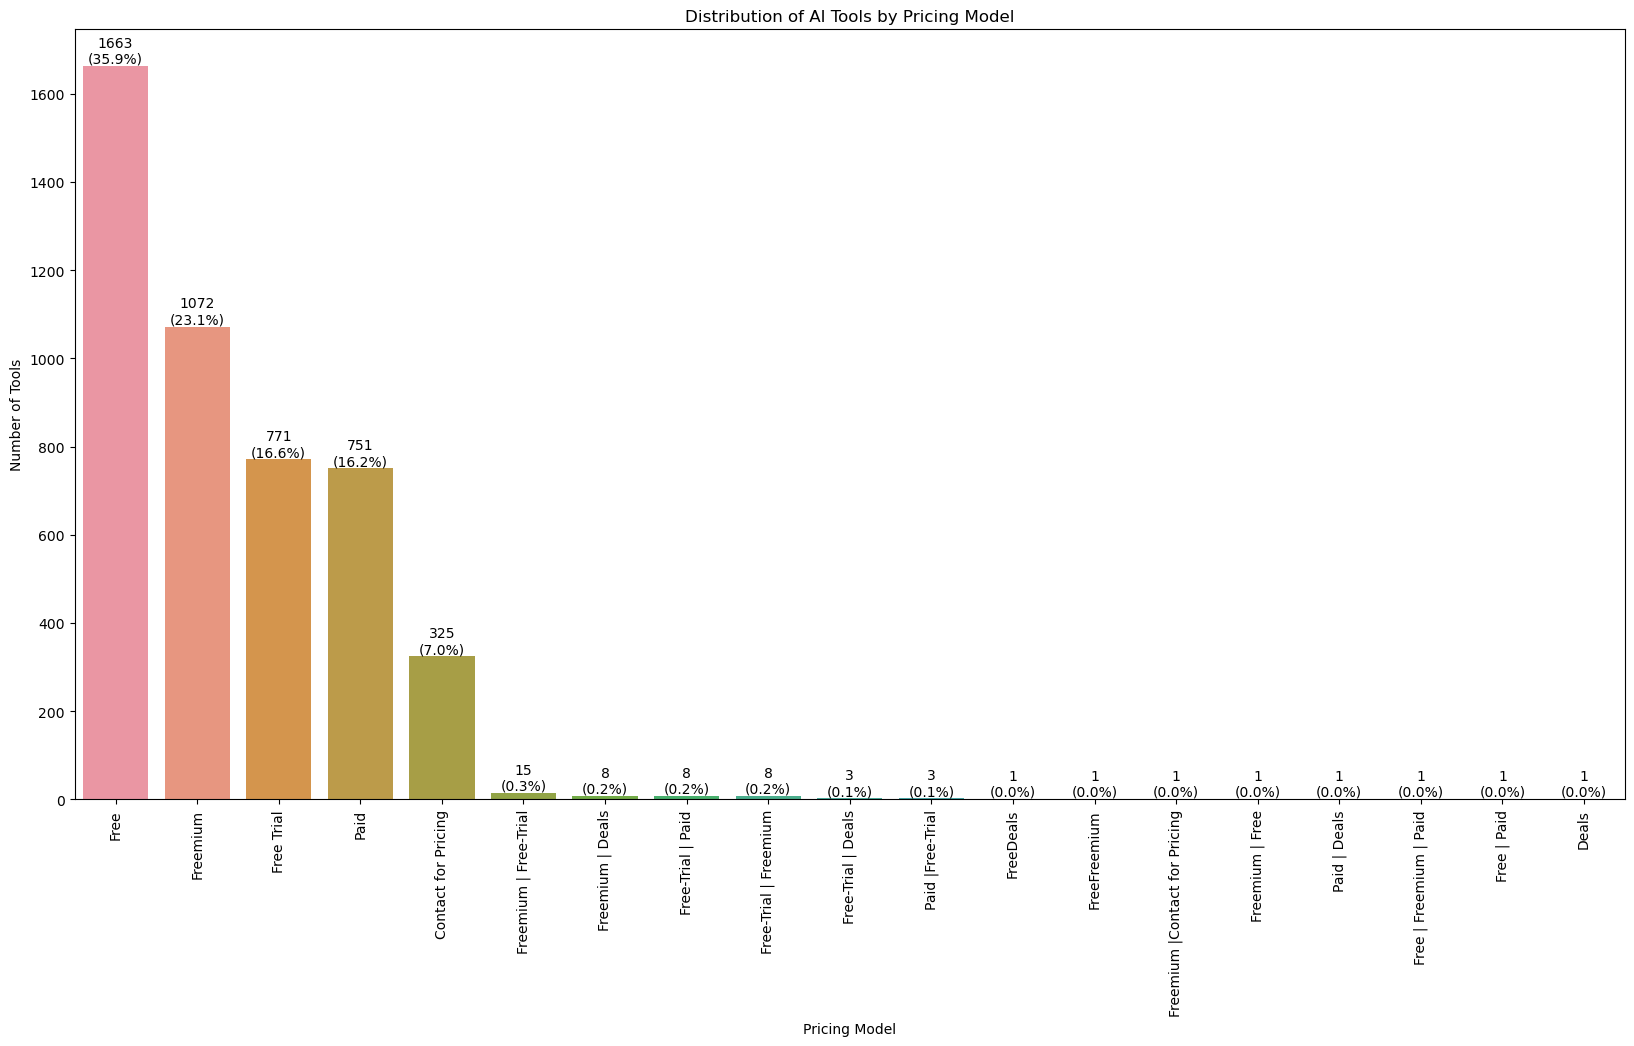

In [9]:
# Distribution of AI Tools Across Different Pricing Models

import matplotlib.pyplot as plt
import seaborn as sns

pricing_model_counts = AI_Tools_2023_df['Free/Paid/Other'].value_counts()

total_tools = pricing_model_counts.sum()
category_percentages = (pricing_model_counts / total_tools) * 100

plt.figure(figsize=(20, 10))
bars = sns.barplot(x=pricing_model_counts.index, y=pricing_model_counts.values)

for bar, percentage in zip(bars.patches, category_percentages):
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_height()
    text = f'{int(text_y)}\n({percentage:.1f}%)'
    bars.text(text_x, text_y, text, ha='center', va='bottom')

plt.title('Distribution of AI Tools by Pricing Model')
plt.xlabel('Pricing Model')
plt.ylabel('Number of Tools')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()   

                 Review Numeric  Charges Numeric
Review Numeric         1.000000        -0.012105
Charges Numeric       -0.012105         1.000000


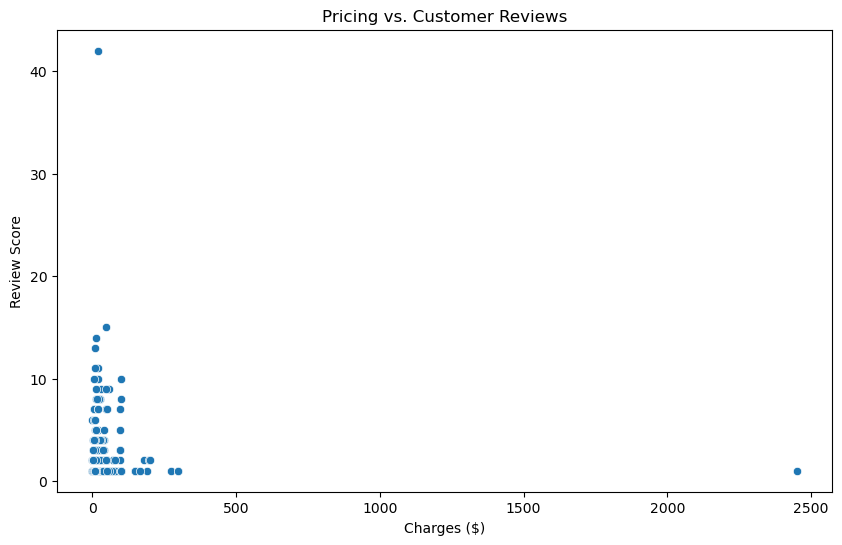

In [10]:
# Correlation between Pricing and Customer Reviews
cleaned_data = AI_Tools_2023_df.dropna(subset=['Review Numeric', 'Charges Numeric'])

correlation = cleaned_data[['Review Numeric', 'Charges Numeric']].corr()
print(correlation)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charges Numeric', y='Review Numeric', data=cleaned_data)
plt.title('Pricing vs. Customer Reviews')
plt.xlabel('Charges ($)')
plt.ylabel('Review Score')
plt.show()

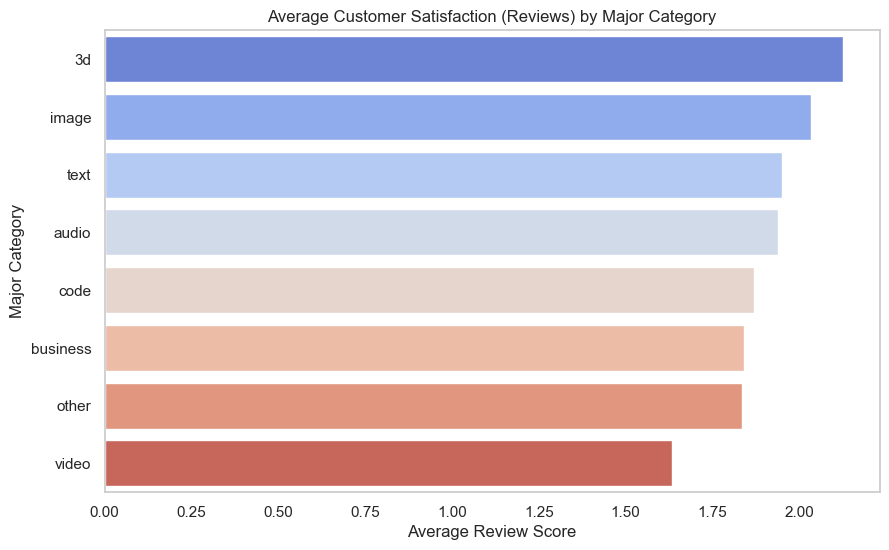

In [11]:
# Average Customer Satisfaction (Reviews) by Major Category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = AI_Tools_2023_df.dropna(subset=['Review Numeric'])

average_reviews_by_category = filtered_data.groupby('Major Category')['Review Numeric'].mean().sort_values(ascending=False)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
average_reviews_bar = sns.barplot(x=average_reviews_by_category.values, y=average_reviews_by_category.index, palette="coolwarm")

plt.title('Average Customer Satisfaction (Reviews) by Major Category')
plt.xlabel('Average Review Score')
plt.ylabel('Major Category')
plt.grid(False)

plt.show()

In [16]:
ml_keywords = ['machine learning', 'ml', 'deep learning', 'neural network']
nlp_keywords = ['natural language processing', 'nlp', 'language model', 'text analysis']
cv_keywords = ['computer vision', 'image recognition', 'object detection', 'cv']

tech_counts = {'Machine Learning': 0, 'Natural Language Processing': 0, 'Computer Vision': 0}
sector_counts = {}

def search_keywords(text, keywords):
    return any(keyword in text.lower() for keyword in keywords)

for _, row in AI_Tools_2023_df.iterrows():
    description = row['Description']

    if search_keywords(description, ml_keywords):
        tech_counts['Machine Learning'] += 1
    if search_keywords(description, nlp_keywords):
        tech_counts['Natural Language Processing'] += 1
    if search_keywords(description, cv_keywords):
        tech_counts['Computer Vision'] += 1

    sector = row['Major Category']
    if sector in sector_counts:
        sector_counts[sector] += 1
    else:
        sector_counts[sector] = 1

tech_counts, sector_counts

({'Machine Learning': 164,
  'Natural Language Processing': 45,
  'Computer Vision': 17},
 {'other': 812,
  'text': 1051,
  'audio': 305,
  'image': 678,
  '3d': 36,
  'code': 534,
  'business': 1121,
  'video': 98})

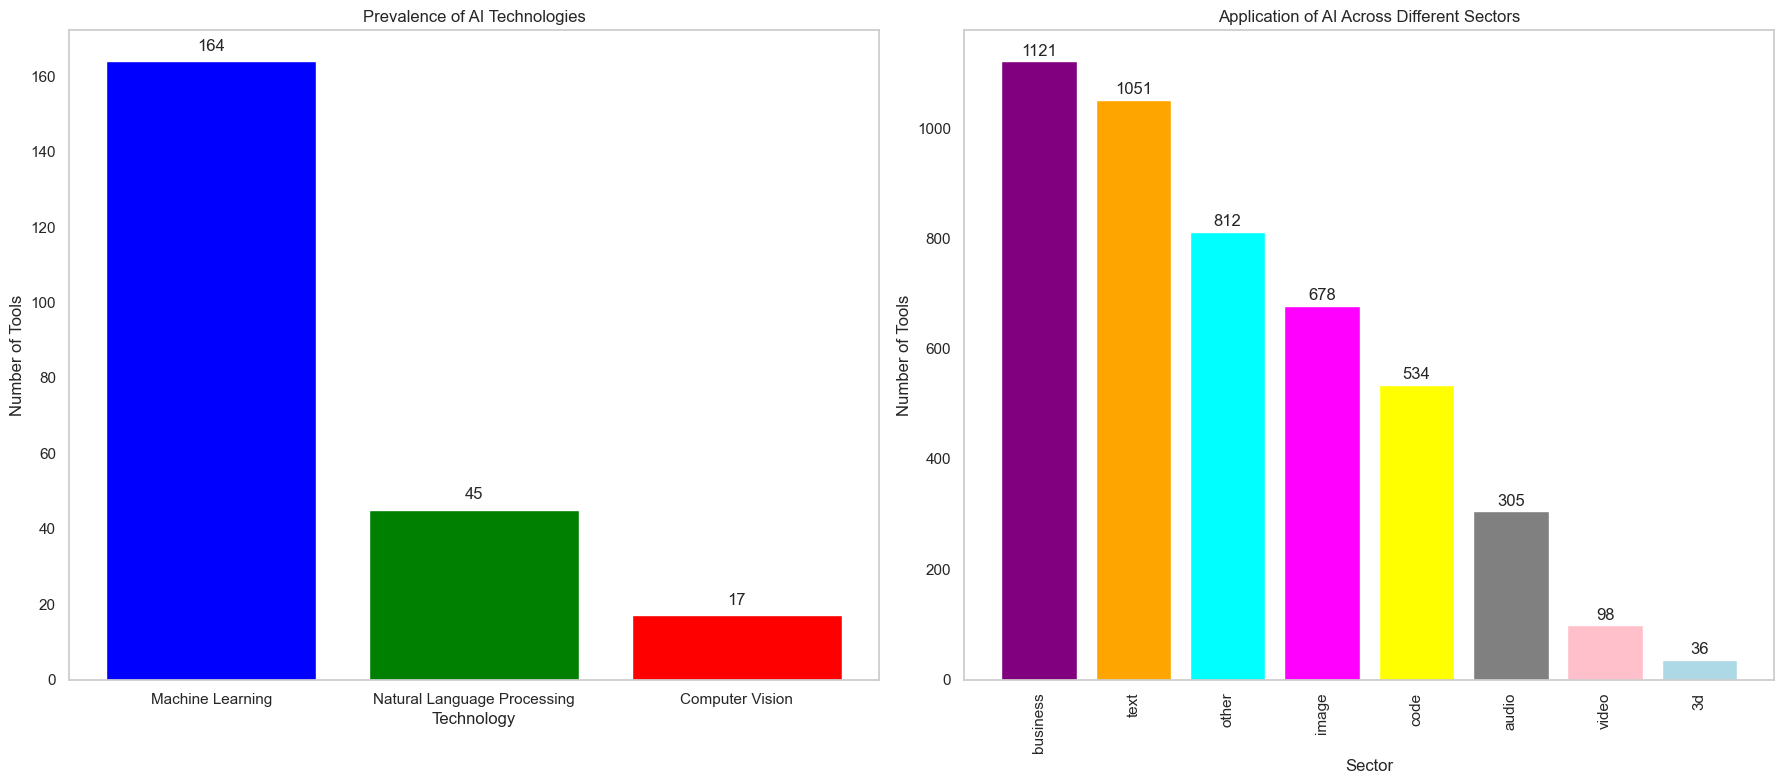

In [25]:
# AI Tool Market Trends

import matplotlib.pyplot as plt

# Preparing the data for visualization
technologies = ['Machine Learning', 'Natural Language Processing', 'Computer Vision']
tech_values = [164, 45, 17]  

sector_counts = {
    'other': 812, 'text': 1051, 'audio': 305, 'image': 678, 
    '3d': 36, 'code': 534, 'business': 1121, 'video': 98
}

sorted_sectors = sorted(sector_counts.items(), key=lambda x: x[1], reverse=True)
sorted_sector_names = [item[0] for item in sorted_sectors]
sorted_sector_values = [item[1] for item in sorted_sectors]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].bar(technologies, tech_values, color=['blue', 'green', 'red'])
ax[0].set_title('Prevalence of AI Technologies')
ax[0].set_xlabel('Technology')
ax[0].set_ylabel('Number of Tools')
ax[0].grid(False)  
for i, value in enumerate(tech_values):
    ax[0].text(i, value + 2, str(value), ha='center', va='bottom')

ax[1].bar(sorted_sector_names, sorted_sector_values, color=['purple', 'orange', 'cyan', 'magenta', 'yellow', 'grey', 'pink', 
                                                            'lightblue'])
ax[1].set_title('Application of AI Across Different Sectors')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('Number of Tools')
ax[1].tick_params(axis='x', rotation=90) 
ax[1].grid(False) 
for i, value in enumerate(sorted_sector_values):
    ax[1].text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()